<a href="https://colab.research.google.com/github/saebswaity/cbir-using-pca/blob/main/Copy_of_pca_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content-based image retrieval
From Wikipedia, the free encyclopedia
Jump to navigationJump to search

General scheme of content-based image retrieval
Content-based image retrieval, also known as query by image content (QBIC) and content-based visual information retrieval (CBVIR), is the application of computer vision techniques to the image retrieval problem, that is, the problem of searching for digital images in large databases (see this survey[1] for a scientific overview of the CBIR field). Content-based image retrieval is opposed to traditional concept-based approaches (see Concept-based image indexing).
https://en.wikipedia.org/wiki/Content-based_image_retrieval

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research.[1][2] The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes.[3] The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.[4]
https://en.wikipedia.org/wiki/CIFAR-10

Principal component analysis

Principal Components Analysis (PCA) is an algorithm to transform the columns of a dataset into a new set of features called Principal Components. By doing this, a large chunk of the information across the full dataset is effectively compressed in fewer feature columns. This enables dimensionality reduction and ability to visualize the separation of classes or clusters if any.
https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/

we will use pca algorithm to extract feature from the image, this feature will be used for matching and return  The most relevant images .

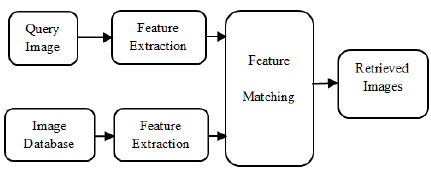

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
(x_train, _), (x_test, _) = cifar10.load_data()
x_train=np.concatenate((x_train,x_test))
print(x_train.shape)
#x_train_vec=x_train.reshape(x_train.shape[0],-1)
#print(x_train_vec[0])


170508288/170498071 [==============================] - 2s 0us/step
(60000, 32, 32, 3)


In [2]:
from skimage import filters
from skimage.data import camera
from skimage.util import compare_images
import skimage

X_data=x_train.reshape(x_train.shape[0],-1)


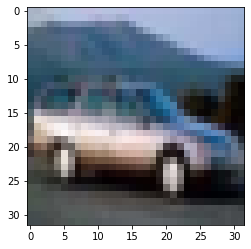

In [3]:
x=X_data[4].reshape([32,32,3])

plt.imshow(x[:,:,0:3].astype(np.uint8))

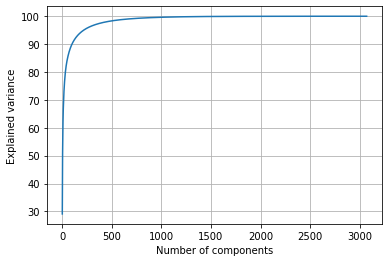

In [4]:
import numpy as np
from sklearn.decomposition import PCA

pca_x = PCA(n_components=32*32*3)
pca_x.fit(X_data)

plt.grid()
plt.plot(np.cumsum(pca_x.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

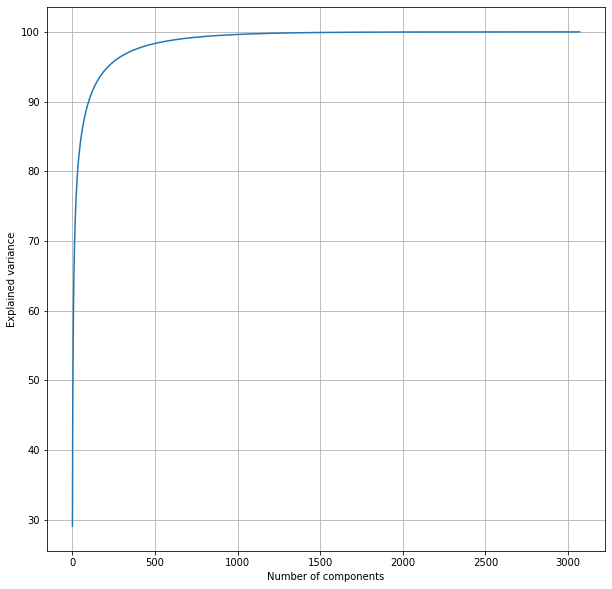

In [5]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(np.cumsum(pca_x.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('Scree plot.png')

In [36]:
#compress the images using pca ,extract the features

import numpy as np
from sklearn.decomposition import PCA
pca_comp = PCA(n_components=100)
cbir_pca_comp = pca_comp.fit_transform(X_data)
inverse_cbir_pca_comp = pca_comp.inverse_transform(cbir_pca_comp)
print(cbir_pca_comp.shape)


(60000, 100)


In [37]:
#save the model
#change the path here 
from joblib import dump, load

pca_cbir10 =  dump(cbir_pca_comp, '/content/drive/MyDrive/models/pca_cbir10.joblib') 
inv_pca_cbir10 = dump(inverse_cbir_pca_comp, '/content/drive/MyDrive/models/inv_pca_cbir10.joblib') 

In [38]:
#load
#change the path here 
import joblib
num=60000
cbir_pca_comp = joblib.load("/content/drive/MyDrive/models/inv_pca_cbir10.joblib")[0:num]
inverse_cbir_pca_comp = joblib.load( '/content/drive/MyDrive/models/inv_pca_cbir10.joblib')[0:num]


In [39]:
#########
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
(x_train, _), (x_test, _) = cifar10.load_data()

x_train=np.concatenate((x_train,x_test))[0:num]
print(x_train.shape)

(60000, 32, 32, 3)


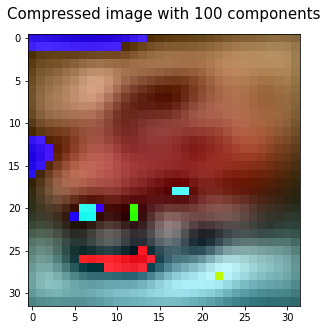

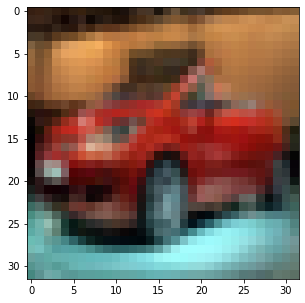

In [45]:

i=45
plt.figure(figsize=(5,5))
image_pca = inverse_cbir_pca_comp[i,:].reshape([32,32,3])
plt.imshow(image_pca.astype(np.uint8))
plt.title('Compressed image with 100 components', fontsize=15, pad=15)
plt.savefig("image_pca.png")
plt.show()
plt.figure(figsize=(5,5))
plt.imshow(x_train[i].astype(np.uint8))
plt.show()


In [46]:
from sklearn.decomposition import PCA
#np.cumsum(cbir_pca_comp.explained_variance_ratio_ * 100)[-1]
print(cbir_pca_comp.shape)

(60000, 3072)


In [47]:
def hstackimgs(min, max, images):
    return np.hstack(images[i] for i in range(min, max))

def sqstackimgs(length, height, images):
    return np.vstack(hstackimgs(i*length, (i+1)*length, images) for i in range(height))

def sbscompare(images1, length, height):
    A = sqstackimgs(length, height, images1)
   
    C = np.ones((A.shape[0], 32, 3))
    
    return A

In [50]:
#print(imagetensor[0],imagetensor[0,:],imagetensor-imagetensor[0])

def einsum_sqrt(a):
  return np.sqrt(np.einsum("ij,ij->i", a, a))
  #return np.sum(np.abs(a))

#print("imagetensor=",imagetensor)
ind=34
com1=einsum_sqrt(cbir_pca_comp-cbir_pca_comp[ind])

#com1=einsum_sqrt(x_train_vec -x_train_vec[ind])
#print("com1= =",com1)
#print(np.argsort(com1))
sorted=np.argsort(com1)
print(sorted)
#print("sorted=",sorted)
#plt.imshow(x_train_vec[ind].reshape(32,32,3))
#plt.show()
"""
for i in sorted[0:15]:
  im=x_train_vec[i].reshape(32,32,3)
  plt.imshow(im)
  plt.show()
"""

[   34 46773  6499 ... 53444  5867 27590]


'\nfor i in sorted[0:15]:\n  im=x_train_vec[i].reshape(32,32,3)\n  plt.imshow(im)\n  plt.show()\n'

(60000,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  


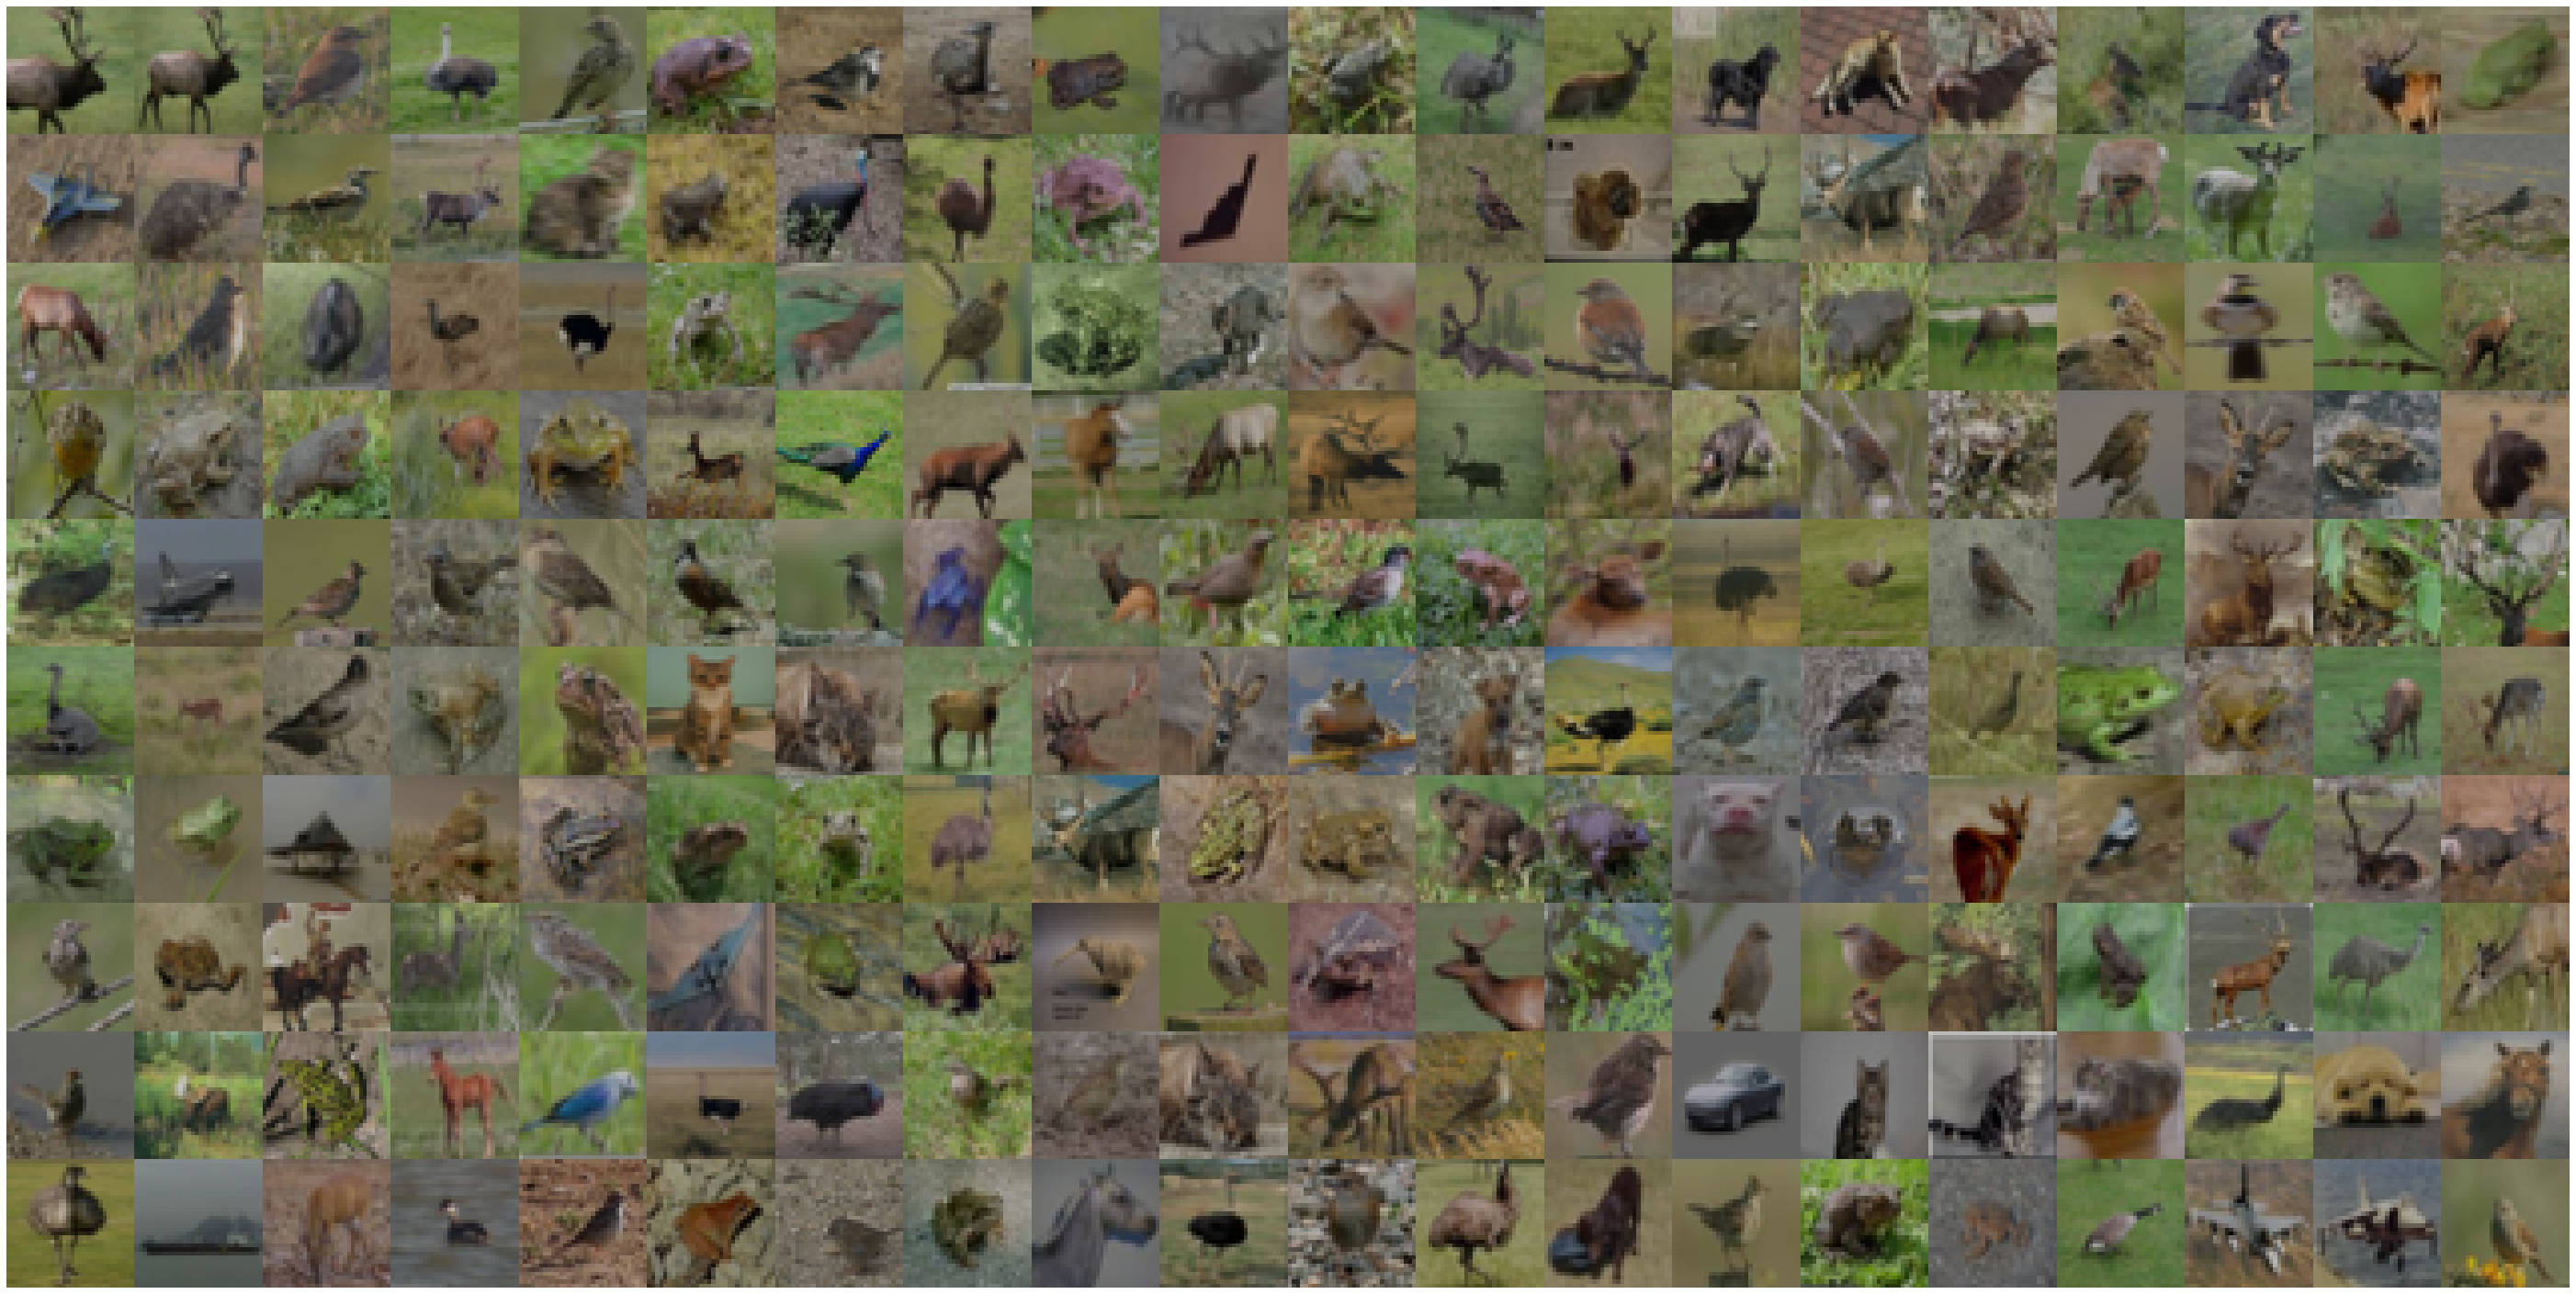

In [51]:
# change the figure size
plt.figure(figsize=(50,50))
#X_data=x_train

print(sorted.shape)
a=x_train[sorted]

#a = a.reshape(max,32,32,3)
#print(a)
#noise = np.random.normal(0, NOISE, x_test.shape)
#pred_imgs = autoencoder.predict(a )

plt.imshow(sbscompare(0.003*a,  20, 10))
plt.axis('off')
plt.rcParams["figure.figsize"] = [22,22]
plt.show()